Importing of the packages

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv('train_1.csv')
test = pd.read_csv('test_1.csv')

print(train.head())
print(train.info())


  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           DRA12       11.600          Low Fat         0.068535  Soft Drinks   
1           DRA24       19.350          Regular         0.066832  Soft Drinks   
2           DRA59        8.270          Regular         0.214125  Soft Drinks   
3           DRB13        6.115          Regular         0.011791  Soft Drinks   
4           DRB25       12.300          Low Fat         0.116261  Soft Drinks   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  143.0154            OUT010                       1998       Small   
1  163.8868            OUT010                       1998       Small   
2  183.9924            OUT010                       1998       Small   
3  189.0530            OUT010                       1998       Small   
4  107.0938            OUT010                       1998       Small   

  Outlet_Location_Type    Outlet_Type  Item_Outlet_Sales  
0               Tier 

In [9]:

print(test.head())
print(test.info())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           DRA12        11.60          Low Fat         0.041010  Soft Drinks   
1           DRB25        12.30          Low Fat         0.069568  Soft Drinks   
2           DRC01         5.92          Regular         0.019230  Soft Drinks   
3           DRC13         8.26          Regular         0.032492  Soft Drinks   
4           DRC24        17.85          Low Fat         0.024860  Soft Drinks   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  141.0154            OUT049                       1999      Medium   
1  106.0938            OUT049                       1999      Medium   
2   47.5692            OUT049                       1999      Medium   
3  124.7730            OUT049                       1999      Medium   
4  151.7998            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket 

In [10]:
print("Data types Train:")
print(train.dtypes,"\n")
print("Data types Test:")
print(test.dtypes)


Datové typy pre Train:
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object 

Datové typy pre Test:
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object


In [11]:

# Number of missing values
print("Number of missing row values v df Train")
print(train.isnull().sum(),"\n")
print("Number of missing row values v df Test")
print(test.isnull().sum())


Počet nulových riadkov v df Train
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64 

Počet nulových riadkov v df Test
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


Using tensorflow for prediction Item_Outlet_Sales 

In [12]:

# Saving original colums for later
original_test = test[['Item_Identifier', 'Outlet_Identifier']].copy()

# input and output values
X = train.drop(columns=['Item_Outlet_Sales']) #input
y = train['Item_Outlet_Sales'] #output

# Dividing sets for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# identifying of numerical and categorical features in train
numerical_features_train = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features_train = X_train.select_dtypes(include=['object']).columns

# identifying of numerical and categorical features in test
numerical_features_test = test.select_dtypes(include=['int64', 'float64']).columns
categorical_features_test = test.select_dtypes(include=['object']).columns

numerical_features = numerical_features_train.union(numerical_features_test)
categorical_features = categorical_features_train.union(categorical_features_test)

# Scaling of numerical values

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Scaling of categorical values

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Using preprocessora for scaling the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
test = preprocessor.transform(test)

# Defining the model

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='relu')
])

# Model compilation

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Training of the model

history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test MAE: {test_mae}')

# Prediction
y_pred = model.predict(X_test)

# Calculating the loss RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE: {rmse}')

print(f'Min sales value: {y.min()}')
print(f'Max sales value: {y.max()}')

# Prediction on submission data
SUB_predictions = model.predict(test)



c:\Users\slecn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 6351209.5000 - mae: 1903.5809 - val_loss: 1291668.1250 - val_mae: 877.4598
Epoch 2/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1277584.3750 - mae: 828.3582 - val_loss: 1131309.1250 - val_mae: 771.9133
Epoch 3/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1154473.2500 - mae: 759.3577 - val_loss: 1142498.3750 - val_mae: 774.2736
Epoch 4/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1110272.7500 - mae: 734.4371 - val_loss: 1159255.5000 - val_mae: 782.7986
Epoch 5/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 996050.5625 - mae: 695.4039 - val_loss: 1191927.5000 - val_mae: 793.4814
Epoch 6/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 935344.5625 - mae: 672.5806 - val_loss: 1202298.1250 - val_mae: 792.4344
Epoch 7/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 921254.3750 - mae: 661.1076 - val_loss: 1239474.5000 - val_mae: 801.9636
Epoch 8/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - lo

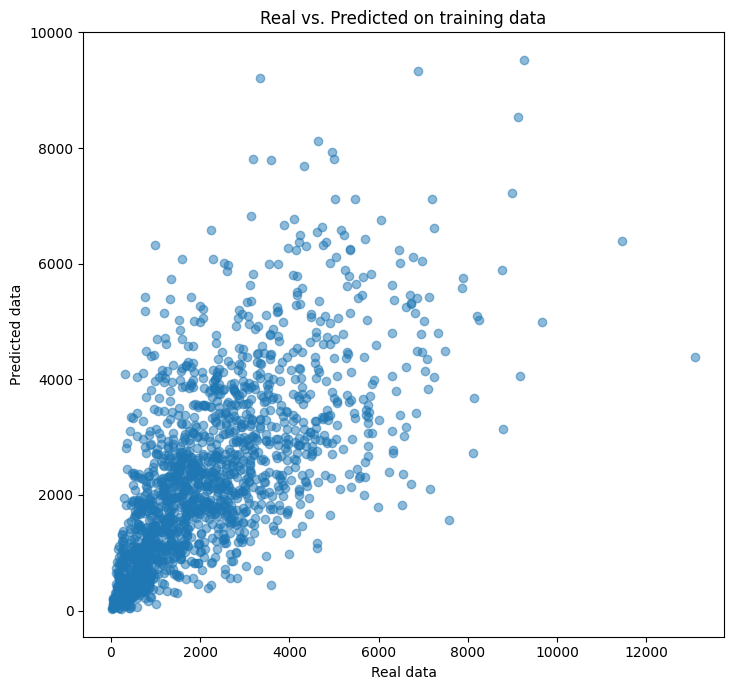

Dáta uložené


In [14]:

# Vizualization of the data
plt.figure(figsize=(14, 7))

# Graph
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Real vs. Predicted on training data')
plt.xlabel('Real data')
plt.ylabel('Predicted data')

plt.tight_layout()
plt.show()

# Saving the data as csv
SUB_predictions = SUB_predictions.flatten()

submission = pd.DataFrame({'Item_Identifier': original_test['Item_Identifier'],
                           'Outlet_Identifier': original_test['Outlet_Identifier'],
                           'Item_Outlet_Sales': SUB_predictions})

submission.to_csv('submission2.csv', index=False)
print('Data successfully saved')



Using Randomforest for prediction Item_Outlet_Sales 

In [40]:
"""
#test = test.drop(columns=['Outlet_Size'])
#train = train.drop(columns=['Outlet_Size'])

# Saving original colums for later
original_test = test[['Item_Identifier', 'Outlet_Identifier']].copy()

# Modifying the cathegorical columns with LabelEncoder
label_encoder = LabelEncoder()
for column in ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type']:
   train[column] = label_encoder.fit_transform(train[column])
   test[column] = label_encoder.transform(test[column])

# Creating dummy variables (one-hot encoding) for 'Item_Type','Outlet_Identifier','Item_Identifier'
train_df = pd.get_dummies(train, columns=['Item_Type','Item_Identifier', 'Outlet_Identifier'])
test_df = pd.get_dummies(test, columns=['Item_Type','Item_Identifier', 'Outlet_Identifier'])

train_df, test_df = train_df.align(test_df, join='left', axis=1)

# Rewriting possible NaN values as 0 
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

# Checking of the data types 
#print(train_df.dtypes)
#print(test_df.dtypes)

# input and output values
X = train_df.drop(columns='Item_Outlet_Sales') #input
y = train_df['Item_Outlet_Sales'] #output

# Dividing sets for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the RandomForest model
# n_estimators - Počet stromov

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Calculating the loss RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)
print(f'Mean Absolute Error: {mae}')


test_df = test_df.drop(columns='Item_Outlet_Sales', errors='ignore')

# Prediction on submission data
test_predictions = model.predict(test_df)

"""


"\n# Zmazanie stĺpca Outlet_Size:\n#test = test.drop(columns=['Outlet_Size'])\n#train = train.drop(columns=['Outlet_Size'])\n\n# Uloženie pôvodných stĺpcov pre neskoršie použitie\noriginal_test = test[['Item_Identifier', 'Outlet_Identifier']].copy()\n\n# Prevod kategórií na číselné hodnoty pomocou LabelEncoder\nlabel_encoder = LabelEncoder()\nfor column in ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type']:\n   train[column] = label_encoder.fit_transform(train[column])\n   test[column] = label_encoder.transform(test[column])\n\n# Vytvorenie dummy variables (one-hot encoding) pre 'Item_Type','Outlet_Identifier','Item_Identifier'\ntrain_df = pd.get_dummies(train, columns=['Item_Type','Item_Identifier', 'Outlet_Identifier'])\ntest_df = pd.get_dummies(test, columns=['Item_Type','Item_Identifier', 'Outlet_Identifier'])\n\n# Zarovnanie trénovacích a testovacích dát na rovnaké features\ntrain_df, test_df = train_df.align(test_df, join='left', axis=1)\n\n# Prepis možných N

In [41]:
"""

# Vizualization of the data
plt.figure(figsize=(14, 7))

# Graph
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Real vs. Predicted on training data')
plt.xlabel('Real data')
plt.ylabel('Predicted data')

plt.tight_layout()
plt.show()

# Saving the data as csv

submission = pd.DataFrame({'Item_Identifier': original_test['Item_Identifier'],
                           'Outlet_Identifier': original_test['Outlet_Identifier'],
                           'Item_Outlet_Sales': SUB_predictions})

submission.to_csv('submission2.csv', index=False)
print('Data successfully saved')
"""

"\n\n# Vizualizácia skutočných vs. predikovaných hodnôt\nplt.figure(figsize=(14, 7))\n\n# Graf skutočných hodnôt vs. predikovaných hodnôt\nplt.subplot(1, 2, 1)\nplt.scatter(y_test, y_pred, alpha=0.5)\nplt.title('Skutočné vs. Predikované na tréningových dátach')\nplt.xlabel('Skutočné hodnoty')\nplt.ylabel('Predikované hodnoty')\n\nplt.tight_layout()\nplt.show()\n\n# Vytvorenie výsledného súboru na odovzdanie\nsubmission = pd.DataFrame({'Item_Identifier': original_test['Item_Identifier'],\n                           'Outlet_Identifier': original_test['Outlet_Identifier'],\n                           'Item_Outlet_Sales': test_predictions})\n\nsubmission.to_csv('submission.csv', index=False)\nprint('Dáta uložené')\n"

: 